In [1]:
# import
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import altair as alt
import warnings
import streamlit as st
from keras.layers import Dense, Activation
from keras.models import Sequential
from tensorflow import keras
from sklearn.cluster import KMeans
# folium
import folium
import folium.plugins as plugins
from streamlit_folium import folium_static

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# NLP
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import string

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file
%matplotlib inline

# this line makes plots prettier on mac retina screens - if you don't have one it shouldn't do anything
%config InlineBackend.figure_format = 'retina'


# Style
sns.set_style(style = 'darkgrid')

In [2]:
df = pd.read_csv('glassdoor1-120.csv')
df.drop(columns = ['Unnamed: 0'], inplace =True)

In [3]:
df.head()

,title,author_info,rating,pros,cons,helpful
0,Amazing workplace,NaN,5.0,Friendly and professional environment with inc...,Fast-moving nature of tech can make disconnect...,Be the first to find this review helpful
1,Great management matters,NaN,5.0,I found the CEO’s tenet that business drives c...,Growing pains and process gaps abound with an ...,Be the first to find this review helpful
2,"Great Benefits, but very fast paced",NaN,4.0,"1- Great benefits such as healthcare, tuition ...",1 - company is growing rapidly so things are c...,Be the first to find this review helpful
3,Fabulous!,NaN,5.0,Salesforce has so many professionals who under...,There are no drawbacks to working at Salesforce!,1 person found this review helpful
4,BDR,NaN,5.0,Just company with great benefits,Working remote can be challenging,Be the first to find this review helpful


## Title

In [5]:
df.columns

Index(['title', 'author_info', 'rating', 'pros', 'cons', 'helpful'], dtype='object')

In [6]:
# vectorize the word using tfidvectorizer from sklearn

tf = TfidfVectorizer(stop_words='english', min_df=3)
tf.fit(df['title'])

sum_tf = tf.transform(df['title'])
sum_df = pd.DataFrame(sum_tf.todense(), columns=tf.get_feature_names())



fig, ax = plt.subplots()
top_texts = sum_df.sum().sort_values(ascending=False)
top_texts.head(30).plot(kind='barh')
print(fig)

fig, ax = plt.subplots()
# Create and generate a word cloud image:
Cloud = WordCloud(width=500, height=400,
                  background_color='black',
                  stopwords=stopwords,
                  min_font_size=3,
                  min_word_length=0).generate_from_frequencies(top_texts)

# background_color="white", max_words=50).generate_from_frequencies(top_texts)

# Display the generated image:
plt.imshow(Cloud, interpolation='bilinear')
plt.axis("off")
print(fig)

ValueError: np.nan is an invalid document, expected byte or unicode string.

/Users/hitomihoshino/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Figure(432x288)
Figure(432x288)


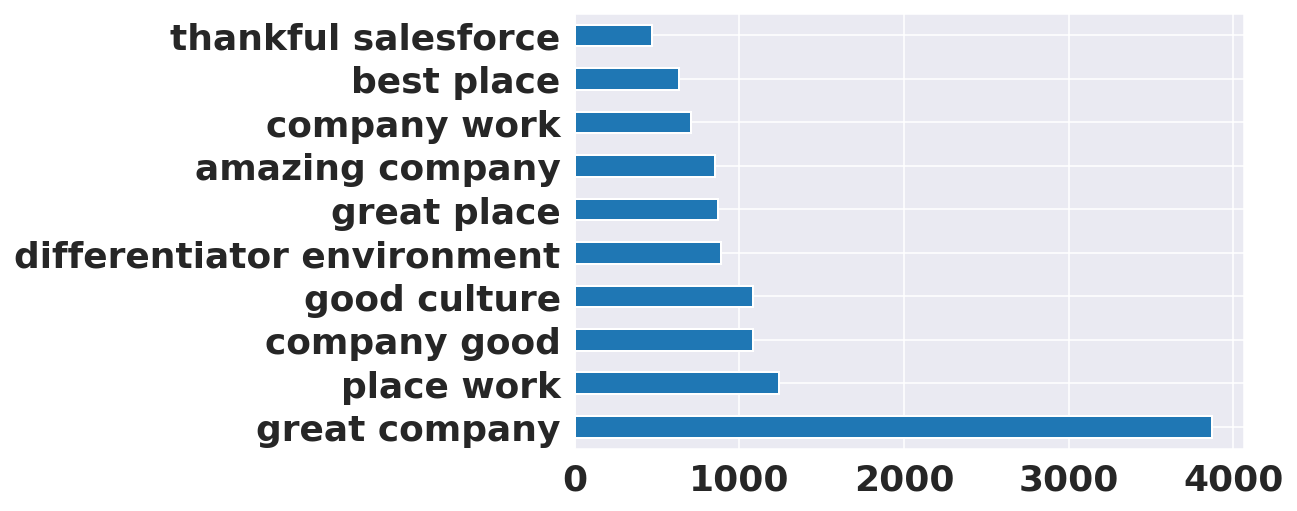

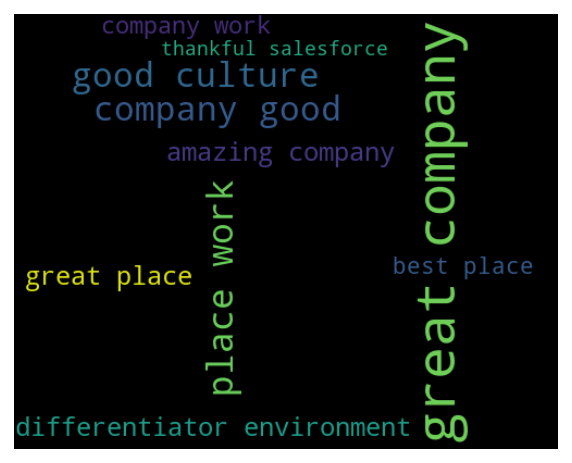

In [18]:
# vectorize the word using tfidvectorizer from sklearn

tf = TfidfVectorizer(stop_words='english', min_df=3, ngram_range = (2,2))
tf.fit(df['Summary'])

sum_tf = tf.transform(df['Summary'])
sum_df = pd.DataFrame(sum_tf.todense(), columns=tf.get_feature_names())



fig, ax = plt.subplots()
top_texts = sum_df.sum().sort_values(ascending=False)
top_texts.head(30).plot(kind='barh')
print(fig)

fig, ax = plt.subplots()
# Create and generate a word cloud image:
Cloud = WordCloud(width=500, height=400,
                  background_color='black',
                  stopwords=stopwords,
                  min_font_size=3,
                  min_word_length=0).generate_from_frequencies(top_texts)

# background_color="white", max_words=50).generate_from_frequencies(top_texts)

# Display the generated image:
plt.imshow(Cloud, interpolation='bilinear')
plt.axis("off")
print(fig)